##  ФИО студента: Голубинов Владислав
##  Группа:       18-ИВТ-3
##  Вариант:      1
##  Задание:      Titanic
1. Определите количество мужчин и женщин, которые ехали на корабле.
2. Определите какой части пассажиров удалось выжить. Посчитайте долю выживших пассажиров. 
3. Какую долю пассажиры первого класса составляли среди всех пассажиров?
4. Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров. 
5. Коррелируют ли число братьев/сестер с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch. Оцените значение p-value. Постройте плотность распределения признаков SibSp и Parch.
6. Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name). Попробуйте вручную разобрать несколько значений столбца Name и выработать правило для извлечения имен, а также разделения их на женские и мужские.
7. Коррелирует ли класс, которым ехал пассажир, с выживаемостью?
8. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. Сделайте выводы. Отобразите данные на одном и нескольких графиках.
9. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам. Сделайте выводы. 
10. Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
train_data = pd.read_csv("dataset/train.csv")

In [3]:
len(train_data)

891

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Пункт 1

In [5]:
print("Кол-во женщин на корабле", len(train_data.loc[train_data.Sex == "female"]))

Кол-во женщин на корабле 314


In [6]:
print("Кол-во мужчин на корабле", len(train_data.loc[train_data.Sex == "male"]))

Кол-во мужчин на корабле 577


## Пункт 2

In [7]:
print("Доля выживших пассажиров", len(train_data.loc[train_data.Survived == True])/len(train_data))

Доля выживших пассажиров 0.3838383838383838


## Пункт 3

In [8]:
print("Доля пассажиров первго класса", len(train_data.loc[train_data.Pclass == 1])/len(train_data))

Доля пассажиров первго класса 0.24242424242424243


## Пункт 4

In [9]:
filtered = train_data[train_data.Age.notnull()]
print(
    "Медиана возвраста",
    filtered.Age.median(),
    "Среднее значение",
    np.average(filtered.Age)
)

Медиана возвраста 28.0 Среднее значение 29.69911764705882


## Пункт 5

In [10]:
train_data[["SibSp", "Parch"]].corr()

,SibSp,Parch
SibSp,1.000000,0.414838
Parch,0.414838,1.000000


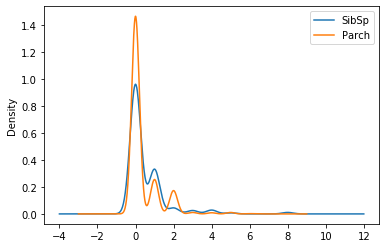

In [11]:
train_data[["SibSp", "Parch"]].plot.kde()

## Пункт 6

In [12]:
import re

train_data.query("Sex == 'female'")['Name']\
    .map(lambda string: re.sub(r'.+(Ms\.|Miss\.|Mrs\.) |".+"|\(".+"\)', '', string))\
    .map(lambda string: re.sub(r'.*\(|\)', '', string))\
    .value_counts()
# Ответ: Mary

Mary                             7
Anna                             4
Bertha                           4
Katherine                        3
Hanora                           3
                                ..
Emily                            1
Agnes                            1
Constance Gladys                 1
Lucy Noel Martha Dyer-Edwards    1
Emelia Maria Vandemoortele       1
Name: Name, Length: 290, dtype: int64

## Пункт 7

In [13]:
train_data[["Survived", "Pclass"]].corr()

,Survived,Pclass
Survived,1.000000,-0.338481
Pclass,-0.338481,1.000000


Уровень p-value достаточно низок, что подтверждает не случайность корреляции

## Пункт 8

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6662f92358>]],
      dtype=object)

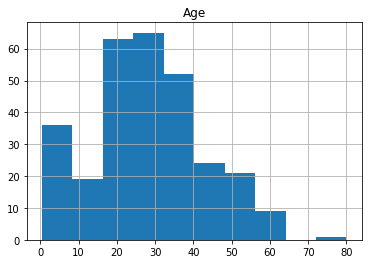

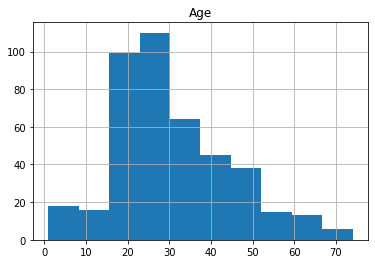

In [14]:
train_data[["Age"]].loc[train_data.Survived == True].hist()
train_data[["Age"]].loc[train_data.Survived == False].hist()

Вывод:  по гистограмме выживших можно судить, что выживаемость была выше среди людей от 20 до 40 лет. 
Также видно, что выживаемость среди детей больше (так как люди стремятся спасать детей в первую очередь).

Пик гистограммы погибших - люди, возраста около 40. Таким образом пик гистограммы выживших смещен по возрасту влево, 
относительно пика гистограммы погибших.

## Пункт 9

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6662cfa320>]],
      dtype=object)

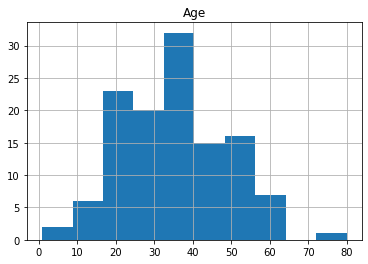

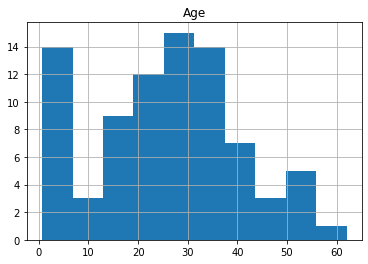

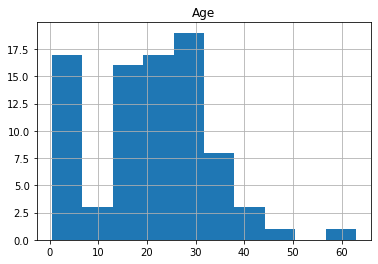

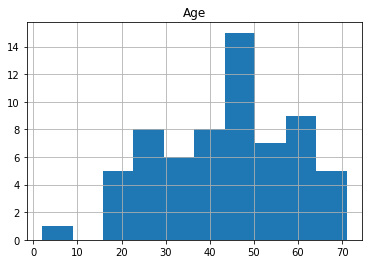

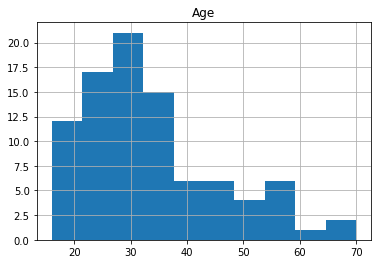

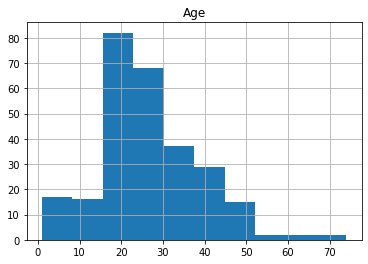

In [15]:
train_data.query("Survived == True and Pclass == 1")[["Age",]].hist()
train_data.query("Survived == True and Pclass == 2")[["Age",]].hist()
train_data.query("Survived == True and Pclass == 3")[["Age",]].hist()
train_data.query("Survived == False and Pclass == 1")[["Age",]].hist()
train_data.query("Survived == False and Pclass == 2")[["Age",]].hist()
train_data.query("Survived == False and Pclass == 3")[["Age",]].hist()

по гистограммам видно, что выживших 1 класса больше, чем выживших 3

## Пункт 10

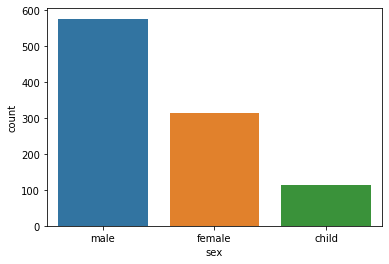

In [16]:
frame = pd.DataFrame({
        'count': [
            len(train_data.loc[train_data.Sex == "male"]),
            len(train_data.loc[train_data.Sex == "female"]),
            len(train_data.query("Age < 18"))
        ],
        'sex': [
            "male",
            "female",
            "child"
        ]
})
sns.barplot(data=frame, y='count', x='sex')